## Import the required libraries & The data

In [1]:
#import the required libearies 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [66]:
#Import the data 
df = pd.read_csv("Data/Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Analyze the overall data

In [68]:
#convert all whitespaces into nan. 
df = df.replace(r'^\s*$', np.nan, regex=True)


In [69]:
#drop any nan
df = df.dropna() 

In [70]:
#Checkout the following:
#Number of rows --> 167 
#null values in anyrow --> none
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## Analyze the highest/lowest countries in each category and compare the category to the gdpp

### Child Mortality 
- The below analysis includes sorting the top 5 worst nations and top 5 best nations when it comes to child mortality 
- The worst country when it comes to child mortality is Haiti and the best country is Iceland
- Clearly poorer nations with lower gdpp have the lowest child mortality rates and vice versa for the richer nations. The wealth of a nation is viewed in terms of gbpp. A scatterplot shows the relationship

In [152]:
df.iloc[df['child_mort'].sort_values(axis=0, ascending=False)[0:5].index]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708


In [100]:
df.iloc[df['child_mort'].sort_values(axis=0, ascending=True)[0:5].index]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100


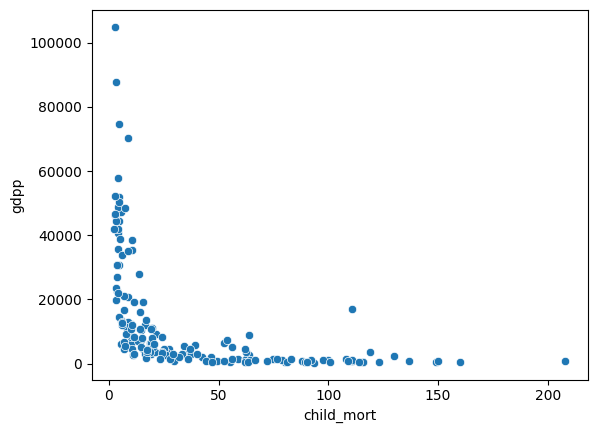

In [108]:
sns.scatterplot(data=df, x=df['child_mort'], y=df['gdpp'])
plt.show()

### The Exports Per Capita
- The below analysis includes sorting the top 5 worst nations and top 5 best nations when it comes to exports
- The worst country when it comes to export is Myanmar and the best country is export Singapore
- Majority of countries have exports below 100 per capita and gdpp below 60000, the wealth of a nation is viewed in terms of gbpp. A scatterplot shows the relationship
- Countries such as Timor-Leste have very low exports but a much better gdpp in comparision to the other countries in list. Therefore, exports alone might not be a direct indicator of countries development 

In [115]:
df.iloc[df['exports'].sort_values(axis=0, ascending=True)[0:5].index]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988
149,Timor-Leste,62.6,2.200,9.12,27.8000,1850,26.50,71.1,6.23,3600
50,Eritrea,55.2,4.790,2.66,23.3000,1420,11.60,61.7,4.61,482
26,Burundi,93.6,8.920,11.60,39.2000,764,12.30,57.7,6.26,231
109,Nepal,47.0,9.580,5.25,36.4000,1990,15.10,68.3,2.61,592


In [116]:
df.iloc[df['exports'].sort_values(axis=0, ascending=False)[0:5].index]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800


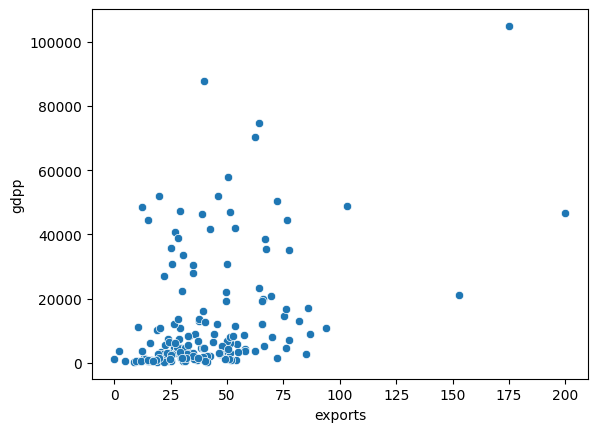

In [117]:
sns.scatterplot(data=df, x=df['exports'], y=df['gdpp'])
plt.show()

### Health Spending Per Capita
- The below analysis includes sorting the top 5 worst nations and top 5 best nations when it comes to health
- The worst country when it comes to health spendings per capita is Qatar and the best country is USA
- Qatar is one of the wealthiest countries in the world and other countries in the list of least spenders when it comes to health are not the poorest countries either. Therefore, health spendings is not the best indicator about a countries development
- The most developed countries in the world namely  USA, Neatherlands, and France are in the top spenders when it comes to health. However, the same can be said about low gdpp countries such as Micronesia and Sierra Leone

In [120]:
df.iloc[df['health'].sort_values(axis=0, ascending=True)[0:5].index]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.300,1.81,23.8000,125000,6.98,79.5,2.07,70300
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988
116,Pakistan,92.1,13.500,2.20,19.4000,4280,10.90,65.3,3.85,1040
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.70,60.4,4.95,2740
154,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.31,67.9,2.83,4440


In [121]:
df.iloc[df['health'].sort_values(axis=0, ascending=False)[0:5].index]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
159,United States,7.3,12.4,17.9,15.8,49400,1.220,78.7,1.93,48400
101,"Micronesia, Fed. Sts.",40.0,23.5,14.2,81.0,3340,3.800,65.4,3.46,2860
132,Sierra Leone,160.0,16.8,13.1,34.5,1220,17.200,55.0,5.20,399
110,Netherlands,4.5,72.0,11.9,63.6,45500,0.848,80.7,1.79,50300
54,France,4.2,26.8,11.9,28.1,36900,1.050,81.4,2.03,40600


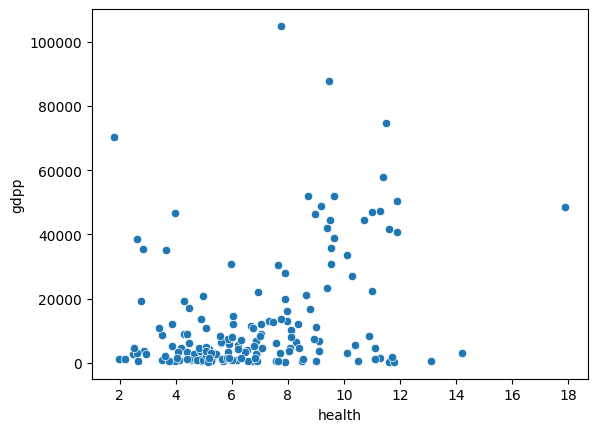

In [122]:
sns.scatterplot(data=df, x=df['health'], y=df['gdpp'])
plt.show()

### The Imports Per Capita
- The below analysis includes sorting the top 5 worst nations and top 5 best nations when it comes to imports
- The worst country when it comes to imports is Myanmar and the best country is Singapore
- There seem to be a linear realtionship between imports and exports. Countries with low imports tend to have low exports per capita and vice versa. When, it comes to a countries development imports is not a good column to use, countries such as Brazil, Japan are in the list of countries with the lowest imports per capita which most likely is due to their population size. Also, very developed counteies such as Luxembourg have one of the highest imports and it is due to their low population

In [127]:
df.iloc[df['imports'].sort_values(axis=0, ascending=True)[0:5].index]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988
22,Brazil,19.8,10.700,9.01,11.8000,14500,8.41,74.2,1.80,11200
77,Japan,3.2,15.000,9.49,13.6000,35800,-1.90,82.8,1.39,44500
159,United States,7.3,12.400,17.90,15.8000,49400,1.22,78.7,1.93,48400
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.90,75.8,2.37,10300


In [128]:
df.iloc[df['imports'].sort_values(axis=0, ascending=False)[0:5].index]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.150,46.5,3.30,1170


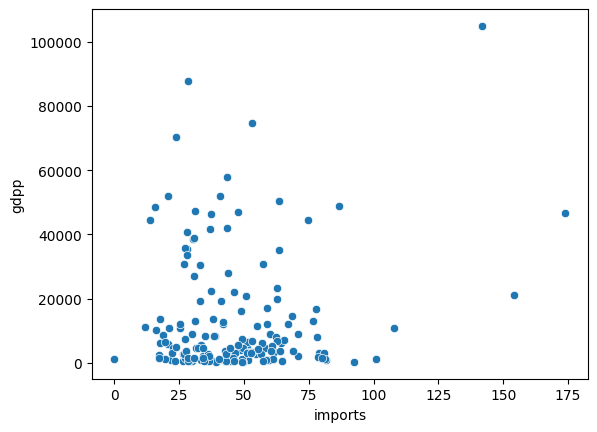

In [129]:
sns.scatterplot(data=df, x=df['imports'], y=df['gdpp'])
plt.show()

### The Net Income Per Person
- The below analysis includes sorting the top 5 worst nations and top 5 best nations when it comes to income
- The worst country when it comes to income is the Congo and the best country is Qatar
- Income and gdpp are linearly correlated. Richer countries have high gdpp and vice cersa

In [130]:
df.iloc[df['income'].sort_values(axis=0, ascending=False)[0:5].index]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


In [131]:
df.iloc[df['income'].sort_values(axis=0, ascending=True)[0:5].index]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446


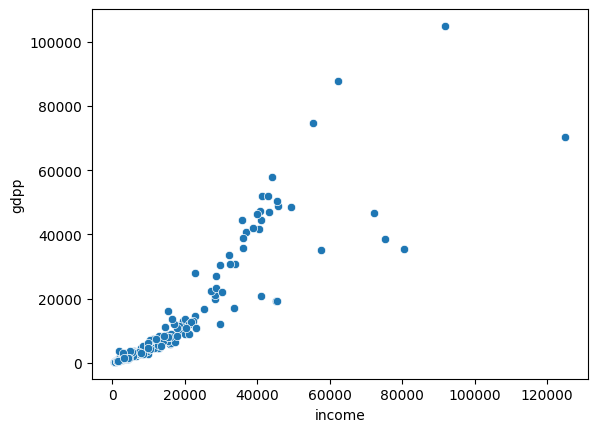

In [132]:
sns.scatterplot(data=df, x=df['income'], y=df['gdpp'])
plt.show()

### The inflation per country 
- The below analysis includes sorting the top 5 worst nations and top 5 best nations when it comes to inflation
- The worst country when it comes to inflation is Nigeria and  best country is Seychelles
- Inflation is not a direct factor to represent the countries development. However, poorer countries tend to depends on richer countries and that impact their overall inflation. The list of countries with the lower inflation have higher gdpp than the list of countries with the highest inflation

In [133]:
df.iloc[df['inflation'].sort_values(axis=0, ascending=False)[0:5].index]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.9,75.4,2.47,13500
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.2,66.2,2.64,2650
149,Timor-Leste,62.6,2.2,9.12,27.8,1850,26.5,71.1,6.23,3600
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.9,60.9,5.21,17100


In [134]:
df.iloc[df['inflation'].sort_values(axis=0, ascending=True)[0:5].index]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400


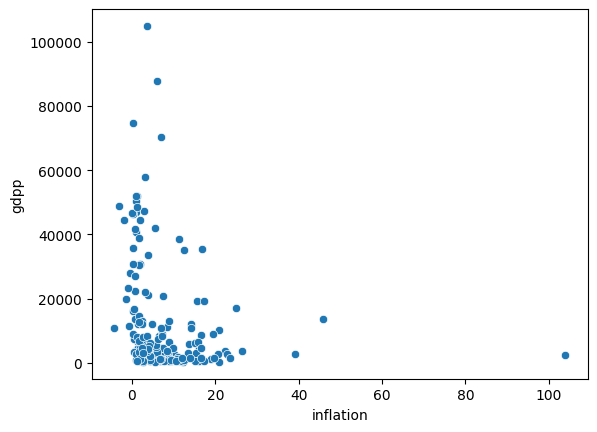

In [135]:
sns.scatterplot(data=df, x=df['inflation'], y=df['gdpp'])
plt.show()

### The Life Expetancy 
- The below analysis includes sorting the top 5 worst nations and top 5 best nations when it comes to life expetancy
- The worst country when it comes to life expetancy is Haiti and the best country is Japan
- More developed countries have a much higher life expetancy and vice versa 

In [138]:
df.iloc[df['life_expec'].sort_values(axis=0, ascending=True)[0:5].index]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459


In [139]:
df.iloc[df['life_expec'].sort_values(axis=0, ascending=False)[0:5].index]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900


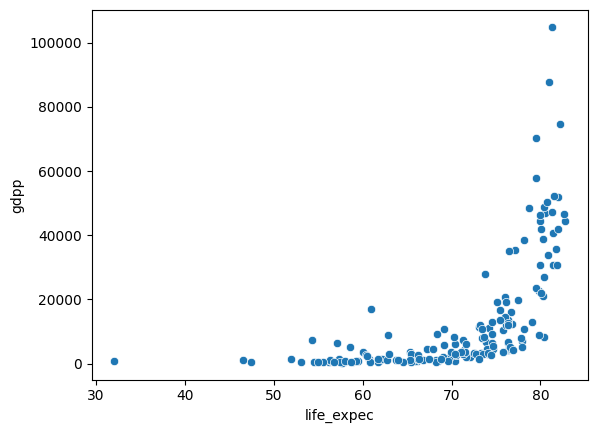

In [140]:
sns.scatterplot(data=df, x=df['life_expec'], y=df['gdpp'])
plt.show()

### The total fertility
- The below analysis includes sorting the top 5 worst nations and top 5 best nations when it comes to the fertility (number of childern per woman)
- The worst country when it comes to  fertility is Niger and the best country is Singapore
- More developed countries tend to have lower fertility rate and vice versa

In [141]:
df.iloc[df['total_fer'].sort_values(axis=0, ascending=False)[0:5].index]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
32,Chad,150.0,36.80,4.53,43.5,1930,6.39,56.5,6.59,897
97,Mali,137.0,22.80,4.98,35.1,1870,4.37,59.5,6.55,708
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231


In [142]:
df.iloc[df['total_fer'].sort_values(axis=0, ascending=True)[0:5].index]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
138,South Korea,4.1,49.4,6.93,46.2,30400,3.160,80.1,1.23,22100
67,Hungary,6.0,81.8,7.33,76.5,22300,2.330,74.5,1.25,13100
102,Moldova,17.2,39.2,11.70,78.5,3910,11.100,69.7,1.27,1630
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610


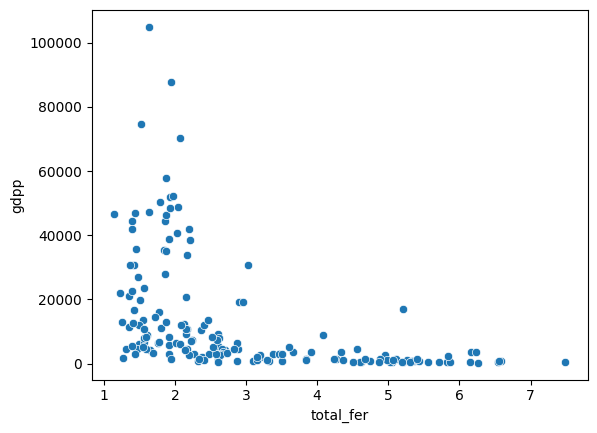

In [143]:
sns.scatterplot(data=df, x=df['total_fer'], y=df['gdpp'])
plt.show()

------------------------------------------------------------------------

------------------------------------------------------------------------

## View the relationship between selected features

- Exports and imports seem to have a somehwat linear realtionship. 

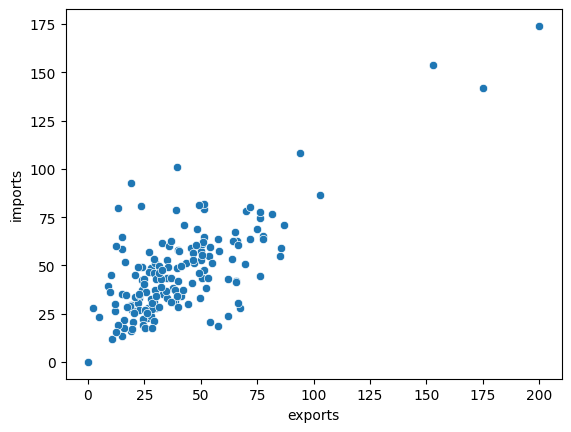

In [145]:
sns.scatterplot(data=df, x=df['exports'], y=df['imports'])
plt.show()

------------------------------------------------------------------------

- Children mortality and total fertility seem to have a linear realtionship. Meaning countries that have higher rate of choldren deaths tend to have more children

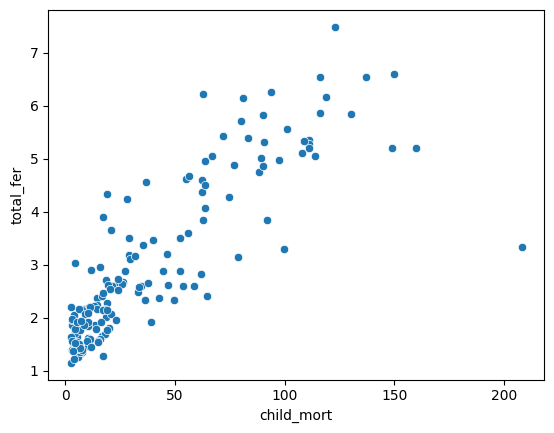

In [147]:
sns.scatterplot(data=df, x=df['child_mort'], y=df['total_fer'])
plt.show()

------------------------------------------------------------------------

- Children mortality and life expectancy have a linear realtionship. Meaning due to the high mortality rate in some countries the life expency value decreases

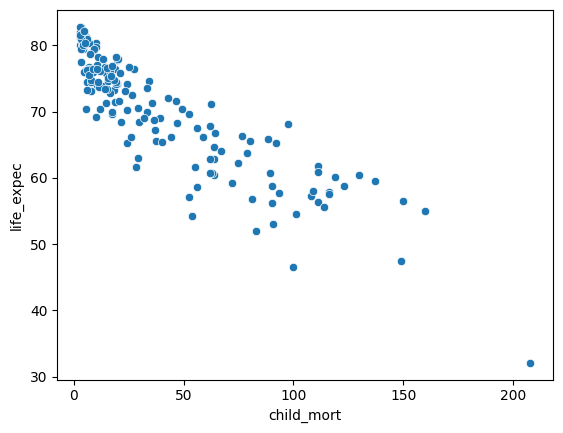

In [150]:
sns.scatterplot(data=df, x=df['child_mort'], y=df['life_expec'])
plt.show()